## Лабораторная работа по курсу "Искусственный интеллект"
## Многослойный персептрон

| Студент | Ежов |
|---------|------|
| Группа  | 7    |

Для начала, скачаем датасет MNIST. Используйте `wget` или `curl`, либо скачайте вручную [по ссылке](https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz).

Теперь загружаем датасет:

In [2]:
    import load_FashionMNIST
    #!wget https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
    !curl -o mnist.pkl.gz https://raw.githubusercontent.com/shwars/NeuroWorkshop/master/Data/MNIST/mnist.pkl.gz
    !gzip -df mnist.pkl.gz

    load_FashionMNIST.download_fmnist()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.9M  100  9.9M    0     0  78.0M      0 --:--:-- --:--:-- --:--:-- 77.4M


In [5]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from Net import *
import numpy as np
with open('mnist.pkl','rb') as f:
    MNIST = pickle.load(f)

In [ ]:
data = MNIST['Train']['Features']
labels = MNIST['Train']['Labels']

Смотрим на то, какие данные получились:

[1 0 1 4 0]
9


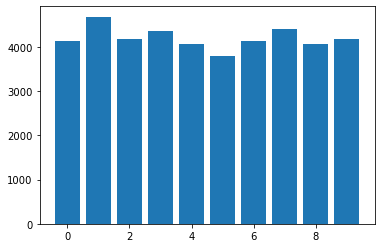

In [ ]:
print(labels[0:5])
print(max(labels))
data.shape
type(labels)
bar_dataset_info(labels).show()

Используйте Scikit Learn для разбиения данных на обучающую и тестовую выборку

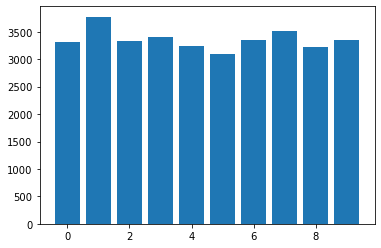

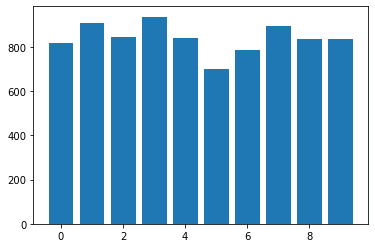

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
bar_dataset_info(train_labels).show()
bar_dataset_info(test_labels).show()

После разделения выборки создадим первую модель с одним слоем - линейным.

In [ ]:
net = Net()
net.add(Linear(784,10))
net.add(Softmax())

pred = np.argmax(net.forward(train_x),axis=1)
acc = (pred==train_labels).mean()
print("Initial loss={}, accuracy={}: ".format(*net.get_loss_acc(train_x,train_labels)))

net.train_epoch(train_x,train_labels, lr=0.00001)
print("Final loss={}, accuracy={}: ".format(*net.get_loss_acc(train_x,train_labels)))
print("Test loss={}, accuracy={}: ".format(*net.get_loss_acc(test_x,test_labels)))

Initial loss=158.24265758340374, accuracy=0.07988095238095239: 
Final loss=5.200173937448251, accuracy=0.8507440476190476: 
Test loss=5.821687703443481, accuracy=0.8444047619047619: 


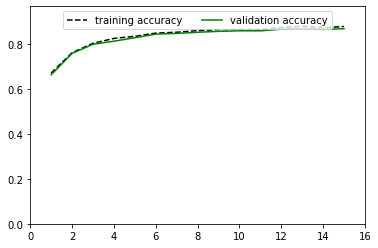

In [ ]:
net_2Linear_Tanh_20= Net()
net_2Linear_Tanh_20.add(Linear(784,20))
net_2Linear_Tanh_20.add(Tanh())
net_2Linear_Tanh_20.add(Linear(20,10))
net_2Linear_Tanh_20.add(Softmax())


res_2Linear_Tanh_20 = net_2Linear_Tanh_20.train_and_plot(15,train_x=train_x, train_labels=train_labels, test_x=test_x, test_labels=test_labels, lr=0.0001)


Initial loss and accuracy = 1.2980262998941607, 0.6699702380952381
Final loss and accuracy = 0.46848921245335956, 0.8771428571428571
Validation loss and accuracy = 0.49417958455133093, 0.8673809523809524


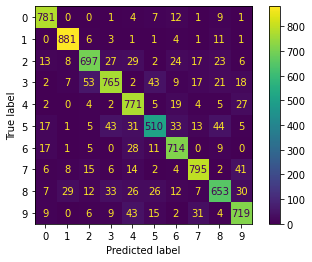

In [ ]:
net_2Linear_Tanh_20.print_confusion_res(res=res_2Linear_Tanh_20, x=test_x, labels=test_labels)

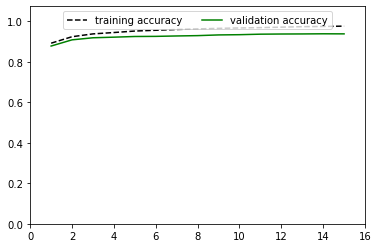

In [ ]:
net_2Linear_Relu_20= Net()
net_2Linear_Relu_20.add(Linear(784,100))
net_2Linear_Relu_20.add(ReLU())
net_2Linear_Relu_20.add(Linear(100,10))
net_2Linear_Relu_20.add(Softmax())


res_2Linear_Relu_20 = net_2Linear_Relu_20.train_and_plot(15,train_x=train_x, train_labels=train_labels, test_x=test_x, test_labels=test_labels, lr=0.0001)


Initial loss and accuracy = 0.40760836716477433, 0.8925297619047619
Final loss and accuracy = 0.07375394908301908, 0.9768154761904762
Validation loss and accuracy = 0.26707655253743073, 0.9385714285714286


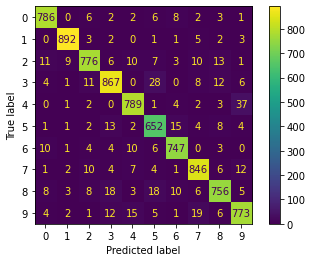

In [ ]:
net_2Linear_Relu_20.print_confusion_res(res=res_2Linear_Relu_20, x=test_x, labels=test_labels)

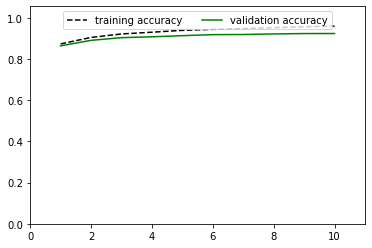

In [ ]:
net_2Linear_Tanh_1000 = Net()
net_2Linear_Tanh_1000.add(Linear(784,1000))
net_2Linear_Tanh_1000.add(Tanh())
net_2Linear_Tanh_1000.add(Linear(1000,10))
net_2Linear_Tanh_1000.add(Softmax())



res_2Linear_Tanh_1000 = net_2Linear_Tanh_1000.train_and_plot(10,train_x=train_x, train_labels=train_labels, 
                                                                test_x=test_x, test_labels=test_labels, lr=0.0001)
                                                                


Initial loss and accuracy = 0.4760423351092859, 0.8727678571428571
Final loss and accuracy = 0.16647075782023305, 0.9591964285714286
Validation loss and accuracy = 0.25445338874579326, 0.9233333333333333


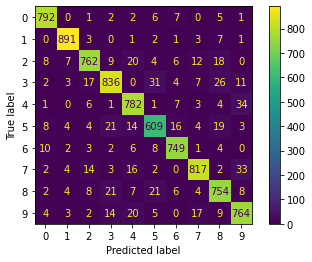

In [ ]:
net_2Linear_Tanh_1000.print_confusion_res(res=res_2Linear_Tanh_1000, x=test_x, labels=test_labels)

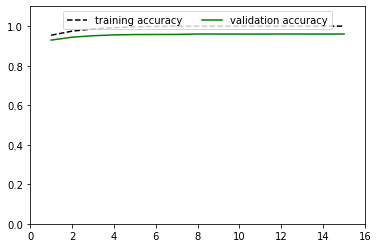

In [ ]:
net_2Linear_Relu_1000= Net()
net_2Linear_Relu_1000.add(Linear(784,1000))
net_2Linear_Relu_1000.add(ReLU())
net_2Linear_Relu_1000.add(Linear(1000,10))
net_2Linear_Relu_1000.add(Softmax())


res2Linear_Relu_1000 = net_2Linear_Relu_1000.train_and_plot(15,train_x=train_x, train_labels=train_labels, 
                                                            test_x=test_x, test_labels=test_labels, lr=0.0001)
                                                            


Initial loss and accuracy = 0.5103752006885841, 0.9539583333333334
Final loss and accuracy = 4.971864281373486e-05, 1.0
Validation loss and accuracy = 0.47048599841628697, 0.96


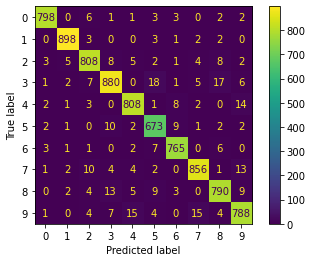

In [ ]:
net_2Linear_Relu_1000.print_confusion_res(res=res2Linear_Relu_1000, x=test_x, labels=test_labels)

### Теперь продолжим работу с датасетом FashionMNIST

In [1]:
from mnist_reader import *
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from Net import *
import numpy as np
train_x, train_labels = load_mnist('FashionMNIST', kind='train')
test_x, test_labels = load_mnist('FashionMNIST', kind='t10k')

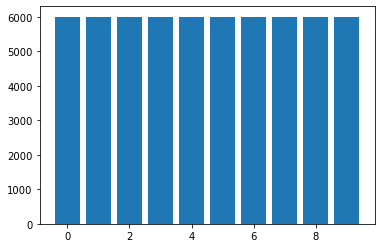

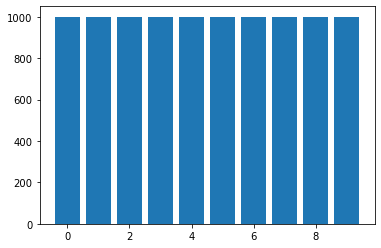

9

In [15]:
bar_dataset_info(train_labels).show()
bar_dataset_info(test_labels).show()
train_x.shape
max(test_labels)

In [10]:
net = Net()
net.add(Linear(784,10))
net.add(Softmax())

pred = np.argmax(net.forward(train_x),axis=1)
acc = (pred==train_labels).mean()
print("Initial loss={}, accuracy={}: ".format(*net.get_loss_acc(train_x,train_labels)))

net.train_epoch(train_x,train_labels, lr=0.000001)
print("Final loss={}, accuracy={}: ".format(*net.get_loss_acc(train_x,train_labels)))
print("Test loss={}, accuracy={}: ".format(*net.get_loss_acc(test_x,test_labels)))

Initial loss=inf, accuracy=0.10251666666666667: 
Final loss=10.531488685077361, accuracy=0.71395: 
Test loss=10.918737007154698, accuracy=0.7112: 


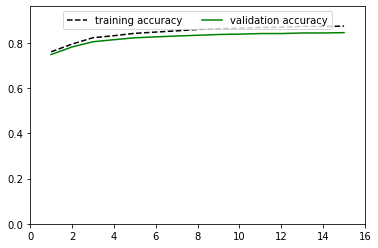

In [27]:
net_3Linear= Net()
net_3Linear.add(Linear(784,100))
net_3Linear.add(ReLU())
net_3Linear.add(Linear(100,50))
net_3Linear.add(ReLU())
net_3Linear.add(Linear(50,10))
net_3Linear.add(Softmax())


res3Linear = net_3Linear.train_and_plot(15,train_x=train_x, train_labels=train_labels, 
                                                            test_x=test_x, test_labels=test_labels, lr=0.0001)

Initial loss and accuracy = 0.6187951175599665, 0.7619333333333334
Final loss and accuracy = 0.3357700580682225, 0.8755333333333334
Validation loss and accuracy = 0.44157301278646666, 0.8467


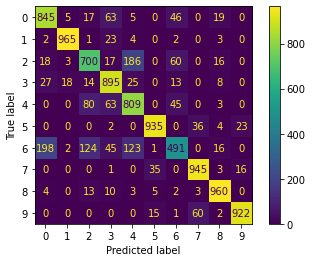

In [28]:
net_3Linear.print_confusion_res(res=res3Linear, x=test_x, labels=test_labels)

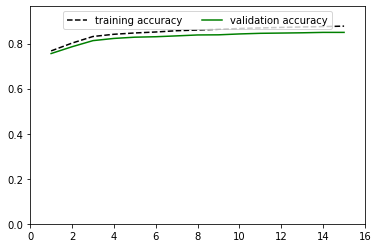

In [23]:
net_3Linear_Tanh= Net()
net_3Linear_Tanh.add(Linear(784,100))
net_3Linear_Tanh.add(ReLU())
net_3Linear_Tanh.add(Linear(100,50))
net_3Linear_Tanh.add(ReLU())
net_3Linear_Tanh.add(Linear(50,10))
net_3Linear_Tanh.add(Softmax())


res3Linear_Tanh = net_3Linear_Tanh.train_and_plot(15,train_x=train_x, train_labels=train_labels, 
                                                            test_x=test_x, test_labels=test_labels, lr=0.0001)

Initial loss and accuracy = 0.5991433557515082, 0.7674
Final loss and accuracy = 0.3287819353550842, 0.8773833333333333
Validation loss and accuracy = 0.4383049054525296, 0.8496


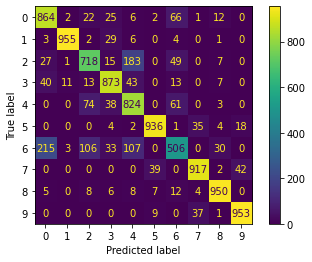

In [24]:
net_3Linear_Tanh.print_confusion_res(res=res3Linear_Tanh, x=test_x, labels=test_labels)

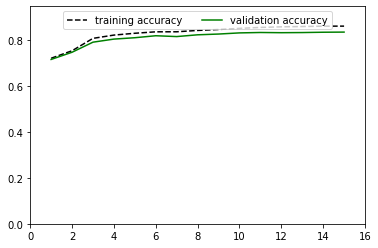

In [19]:
net_2Linear= Net()
net_2Linear.add(Linear(784,100))
net_2Linear.add(ReLU())
net_2Linear.add(Linear(100,10))
net_2Linear.add(Softmax())

res2Linear = net_2Linear.train_and_plot(15,train_x=train_x, train_labels=train_labels, 
                                                            test_x=test_x, test_labels=test_labels, lr=0.0001)

Initial loss and accuracy = 0.5348797201256298, 0.8130666666666667
Final loss and accuracy = 0.31924002236443594, 0.88255
Validation loss and accuracy = 0.4114041773999812, 0.8575


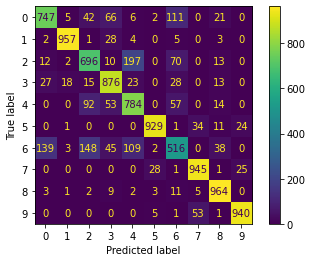

In [20]:
net_2Linear.print_confusion_res(res=res3Linear, x=test_x, labels=test_labels)

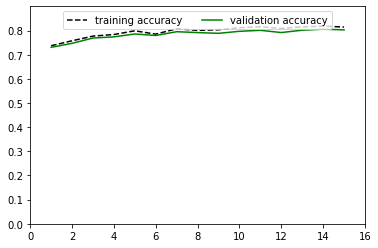

In [21]:
net_2Linear_Tanh= Net()
net_2Linear_Tanh.add(Linear(784,100))
net_2Linear_Tanh.add(Tanh())
net_2Linear_Tanh.add(Linear(100,10))
net_2Linear_Tanh.add(Softmax())

res2Linear_Tanh = net_2Linear_Tanh.train_and_plot(15,train_x=train_x, train_labels=train_labels, 
                                                            test_x=test_x, test_labels=test_labels, lr=0.0001)

Initial loss and accuracy = 0.8330899281063477, 0.7370166666666667
Final loss and accuracy = 0.5188157216991184, 0.8142833333333334
Validation loss and accuracy = 0.5467474148225715, 0.8027


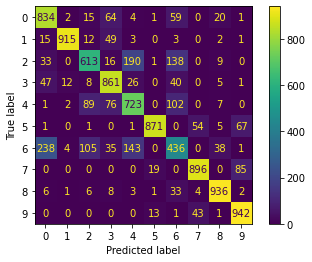

In [22]:
net_2Linear_Tanh.print_confusion_res(res=res2Linear_Tanh, x=test_x, labels=test_labels)